«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

*Описание тарифов*  
*Тариф «Смарт»*

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

*Описание таблиц*

*Таблица users* (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

*Таблица calls* (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

*Таблица messages* (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

*Таблица internet* (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

*Таблица tariffs* (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st

## 1. Откроем файлы с данными и изучим общую информацию.

убрала:)

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
pd.set_option('display.max_columns', 50)

**Таблица users.**

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Видим пропуски в столбце *churn_date*. Приведем столбцы c дата-значениями к соответствующему типу данных.

In [6]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Таблица calls.**

In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


С помощью гистограммы посмотрим распределение значений длительности звонков столбца *duration*.

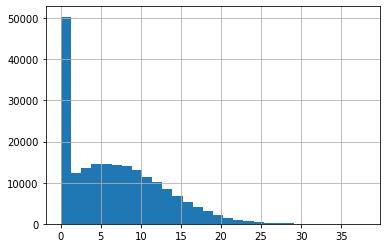

In [10]:
calls.duration.hist(bins=30)

На гистограмме заметно большое количество нулевых по длительности звонков. Предполагаем, скорее всего автоматика классифицировала их, как нулевые, но из условий тарифа оператора "Мегалайн" известно,что время разговора округляется в большую сторону, все сверхкороткие звонки должны быть округлены до 1 минуты. Заменим все 0 на 1, округлим все длительности звонков в большую сторону с точностью до 1 минуты. Изменим тип данных в столбце duration с вещественного на целочисленный. Столбец *id* также приведем к целочисленному типу.

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls['duration'] = calls['duration'].replace(0, 1)
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
#calls['id'] = calls['id'].astype('int')

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


**Таблица messages.**

In [13]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
#messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


**Таблица internet.**

In [16]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [17]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [19]:
#internet['id'] = internet['id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


**Таблица tariffs.**

In [20]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [22]:
#Проверим, все ли пользователи уникальные:
users.duplicated().sum()

0

Поняла, тогда user_id оставляем, как есть? Или надо разбивать на два столбца int в таких случаях...

Поняла, спасибо!

## Шаг 2. Подготовка данных.

**Посчитайте для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Количество сделанных звонков и израсходованных минут разговора по месяцам.**

In [23]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [24]:
calls_report = (calls.groupby(['user_id', 'month'])
                     .agg({'duration':'sum', 'id':'count'})
                     .reset_index()
                     .rename(columns={'duration':'duration_month_min','id':'calls_month'}))
calls_report.head()

,user_id,month,duration_month_min,calls_month
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58


**Количество отправленных сообщений по месяцам.**

In [25]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [26]:
messages_report = (messages.groupby(['user_id', 'month'])
                           .agg({'id':'count'})
                           .reset_index()
                           .rename(columns={'id':'sms_month'}))
messages_report.head()

,user_id,month,sms_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Объем израсходованного интернет-трафика по месяцам.**

In [27]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [28]:
internet_report = internet.groupby(['user_id', 'month'])\
                          .agg({'mb_used':'sum'})\
                          .reset_index()\
                          .rename(columns={'mb_used':'mb_month'})
internet_report.head()

,user_id,month,mb_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


**Помесячная выручка с каждого пользователя.**

Объединим датасеты calls_report и messages_report.

In [29]:
df = calls_report.merge(messages_report, on=['user_id','month'], how='outer')
df.head()

,user_id,month,duration_month_min,calls_month,sms_month
0,1000,5,164.0,22.0,22.0
1,1000,6,187.0,43.0,60.0
2,1000,7,346.0,47.0,75.0
3,1000,8,418.0,52.0,81.0
4,1000,9,478.0,58.0,57.0


Объединим полученный датасет со сгруппированными данными по выручке от интернет-траффика.

In [30]:
df = df.merge(internet_report, on=['user_id','month'], how = 'outer')
df.head()

,user_id,month,duration_month_min,calls_month,sms_month,mb_month
0,1000,5,164.0,22.0,22.0,2253.49
1,1000,6,187.0,43.0,60.0,23233.77
2,1000,7,346.0,47.0,75.0,14003.64
3,1000,8,418.0,52.0,81.0,14055.93
4,1000,9,478.0,58.0,57.0,14568.91


Продолжим объединять, добавим тариф в датасет.

In [31]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [32]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,duration_month_min,calls_month,sms_month,mb_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,164.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,187.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,346.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,418.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,478.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [33]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,duration_month_min,calls_month,sms_month,mb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Проверим пропуски.

In [34]:
df.isna().sum()

user_id                     0
month                       0
duration_month_min         40
calls_month                40
sms_month                 497
mb_month                   11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Заполним пропуски нулями, для тех, кто не пользуется опциями смс, интернет.

In [35]:
df['sms_month'] = df['sms_month'].fillna(0)
df['mb_month'] = df['mb_month'].fillna(0)
df['duration_month_min'] = df['duration_month_min'].fillna(0)
df['calls_month'] = df['calls_month'].fillna(0)
df.isna().sum()

user_id                     0
month                       0
duration_month_min          0
calls_month                 0
sms_month                   0
mb_month                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [36]:
df.duplicated().sum()

0

Напишем функцию, возвращающую сумму оплаты в месяц сверх определенной тарифом, если таковое имеет место быть.

In [37]:
def excess_tariff(row):
    sms = (row['sms_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['duration_month_min'] - row['minutes_included']) * row['rub_per_minute']
    #mbs = np.floor((row['mb_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    mbs = np.ceil((row['mb_month'] - row['mb_per_month_included'])/ 1024) * row['rub_per_gb']
    rezult = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            rezult += i
    return rezult

In [38]:
df['excess_tariff'] = df.apply(lambda x: excess_tariff(x), axis=1)
df['sum_paid'] = df['rub_monthly_fee'] + df['excess_tariff']
#df.sort_values(by='sum_paid',ascending = False).head()
df.sort_values(by='sum_paid').tail()

,user_id,month,duration_month_min,calls_month,sms_month,mb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,excess_tariff,sum_paid
1793,1286,12,751.0,95.0,68.0,35108.07,19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,4807.0,5357.0
3105,1486,11,788.0,108.0,96.0,36266.11,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,5202.0,5752.0
1622,1261,12,1102.0,141.0,22.0,32650.91,46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,5206.0,5756.0
260,1042,12,755.0,121.0,75.0,37165.69,42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,5240.0,5790.0
3106,1486,12,1025.0,133.0,83.0,38552.45,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,6274.0,6824.0


## Шаг 3. Анализ данных

*Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.*

**Среднее количество, дисперсия и стандартное отклонение** 

**Информация по суммарным расходам**

In [39]:
column_list = ['smart', 'ultra']

def stat_hist(hist_param):
    for i in range(len(column_list)):
        df[df['tariff'] == column_list[i]][hist_param].plot(kind='hist', bins=10, alpha=0.5, label=column_list[i], title = title).legend(loc='upper right')
    return df.groupby('tariff').agg({hist_param:['median','mean','var','std']}).style.format("{:.2f}")

In [40]:
#df.boxplot('total_paid', by='tariff', figsize=(10,10)).set_ylim(0,7000)

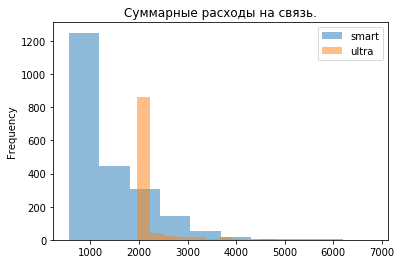

In [41]:
title = 'Суммарные расходы на связь.'
stat_hist('sum_paid')

Абоненты тарифа ultra чаще укладываются в месячную абонентскую плату, а абоненты на тарифе smart чаще тратят на услуги связи в 2-3 раза больше, чем размер абонентской платы. Тариф smart более массовый.

**Информация по звонкам**

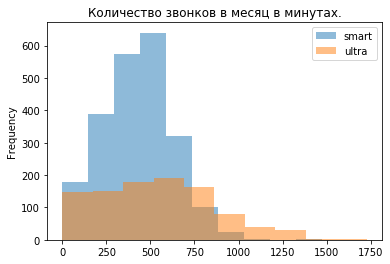

In [42]:
title = 'Количество звонков в месяц в минутах.'
stat_hist('duration_month_min')

Абоненты обоих тарифов в основном укладываются в установленные для своих тарифов пакеты минут, однако абоненты тарифа ultra значительно не добирают голосовой трафик.

**Информация по пакетам интернет траффика**

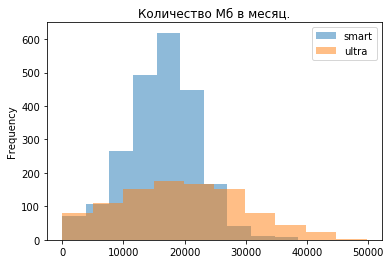

In [43]:
title = 'Количество Мб в месяц.'
stat_hist('mb_month')

Абоненты тарифа smart выходят за пределы тарифа чаще, на тарифе ultra абоненты в основном не добирают оговоренный в тарифе интернет трафик, но при этом все равно потребляют больше информации, чем абоненты тарифа smart.

**Информация по пакетам смс**

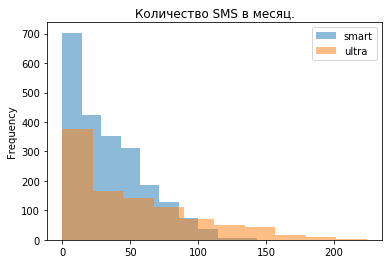

In [44]:
title = 'Количество SMS в месяц.'
stat_hist('sms_month')

Суммарное количество отправленных сообщений на тарифе smart выше, чем на тарифе ultra, причем абоненты ultra выбирают трафик sms лишь на 20%, а абоненты тарифа smart иногда выходят за лимиты пакета sms на данном тарифе.

Построим диаграммы размаха, чтобы определить характерный разброс данных трех датасетов - длительность звонка, количество отправленных СМС, объем использованного интернет трафика. Определим диапазоны нормальных значений, между которыми находятся данные в каждой таблице.

In [45]:
def norm_values(df, column, tariff):
    q1 = df[df['tariff'] == tariff][column].quantile(0.25)                 
    q3 = df[df['tariff'] == tariff][column].quantile(0.75)
    mq = q3 - q1
    if q1 - 1.5 * mq < 0:
        begin=0
    else: 
        begin = q1 - 1.5 * mq
    end = q3 + 1.5 * mq
    print('Границы интервала для столбца "{}", тариф "{}": {} - {}'.format(column, tariff, begin, end))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Границы интервала для столбца "duration_month_min", тариф "smart": 0 - 963.5
Границы интервала для столбца "duration_month_min", тариф "ultra": 0 - 1494.5
Границы интервала для столбца "sms_month", тариф "smart": 0 - 112.5
Границы интервала для столбца "sms_month", тариф "ultra": 0 - 188.5
Границы интервала для столбца "mb_month", тариф "smart": 1543.129999999992 - 31142.810000000005
Границы интервала для столбца "mb_month", тариф "ultra": 0 - 49438.83500000001


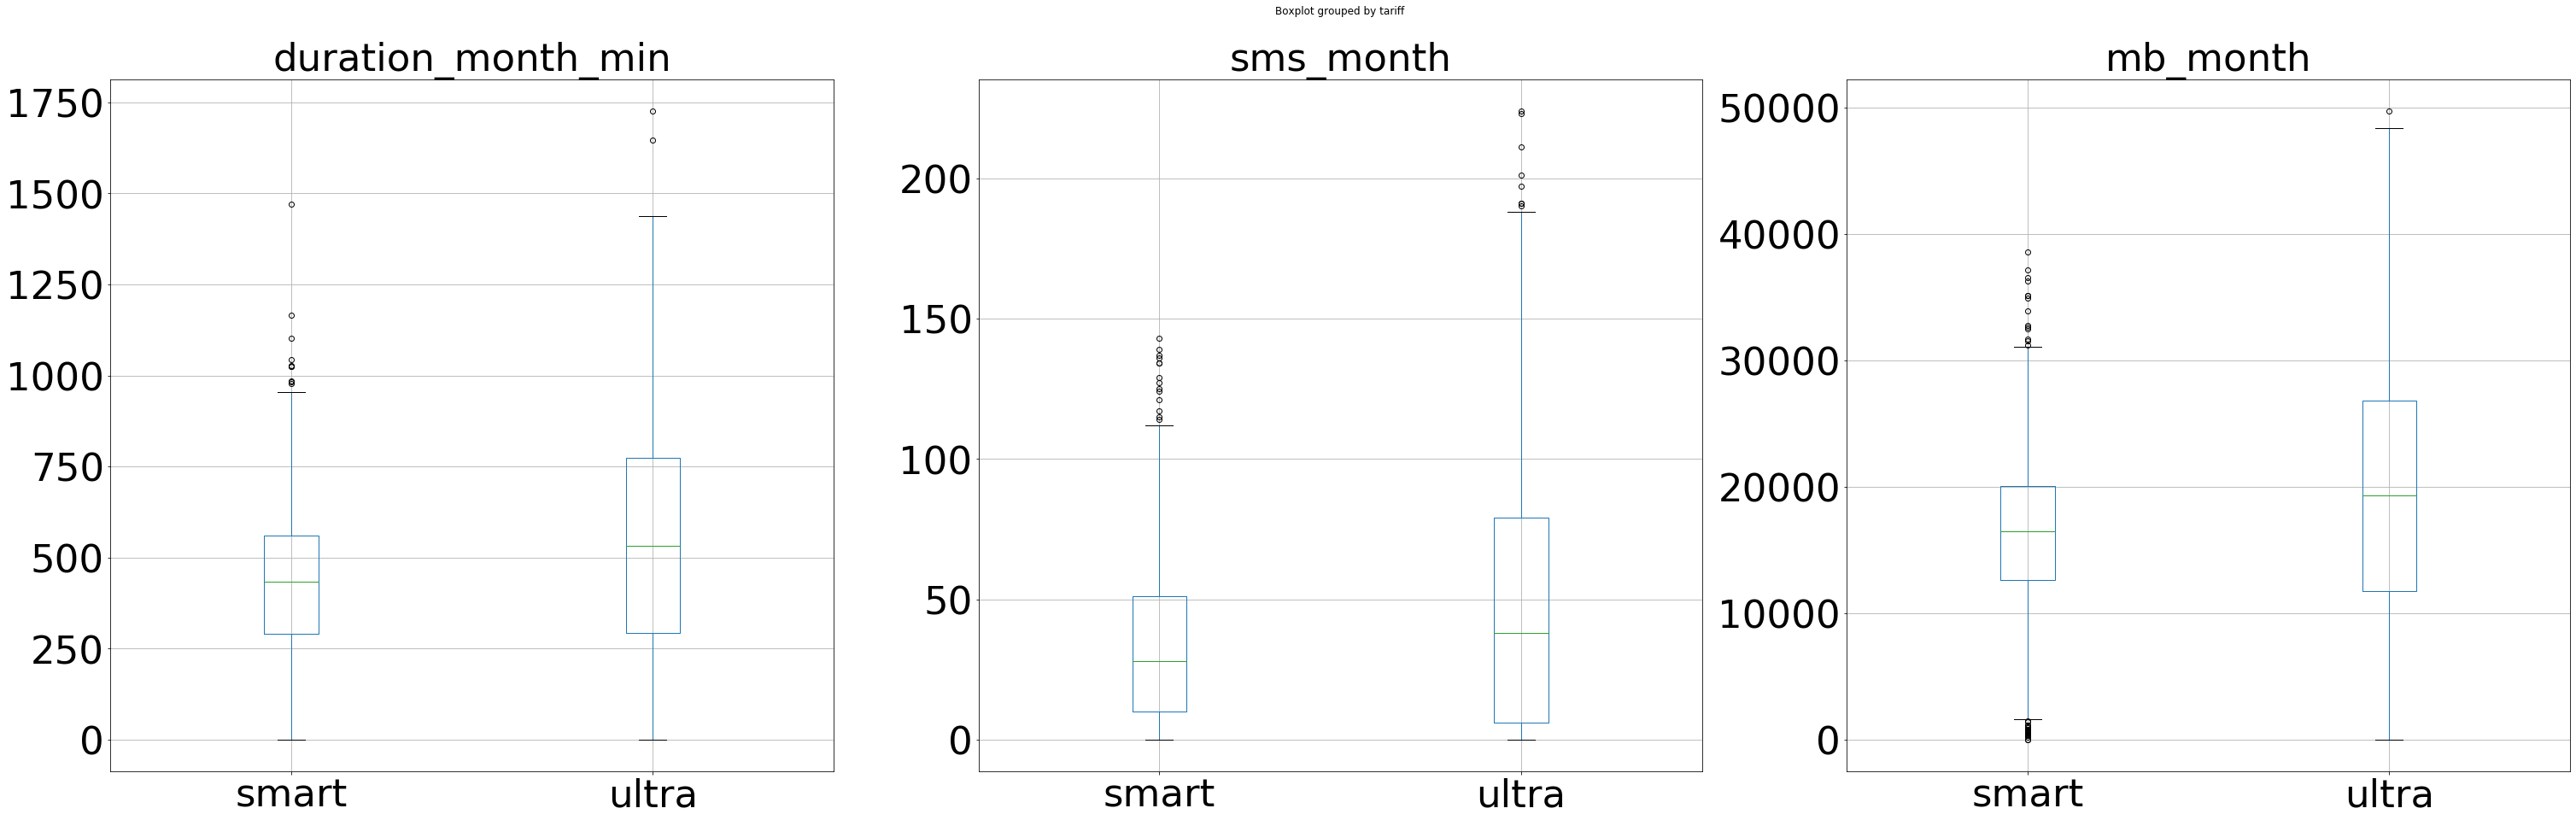

In [46]:
column_list = ['duration_month_min', 'sms_month', 'mb_month']
rows = 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(50,15))
column_list_counter = 0               
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[c], by='tariff', fontsize=45, ax=axes[c])
        ax.set_title(column_list[c])
        ax.title.set_size(45)
        ax.set_xlabel('')
        #column_list_counter += 1

i=0
tariff_list = ['smart', 'ultra']   
for i in range(len(column_list)):
    for j in range(len(tariff_list)):
        norm_values(df, column_list[i], tariff_list[j])


Рассмотрим внимательнее диаграмму длительности разговоров в минутах за месяц на каждом из тарифов. Мы видим, что основная совокупность значений длительности звонков в минуту на тарифе smart лежит в пределах 963 минут, что значительно превышает пакет минут, определенный тарифом, также на диаграмме присутствуют скачки, превышающие 16 часов разговора в месяц, таких данных немного, но они имеют место быть. На тарифе ultra основная совокупность значений длительности звонков в минуту лежит в пределах 1494 минут, это значительно меньше, чем количество минут, определенное пакетом тарифа, но также мы видим на диаграмме, что есть скачки значений длительности разговоров в пределах 30 часов. 

Рассмотрим диаграмму посылаемых смс сообщений в месяц абонентами тарифов smart и ultra. Мы видим, что основная совокупность абонентов тарифа smart отправляет смс в пределах 112 сообщений в месяц, это почти в два раза превышает лимит пакета для данного тарифа - 50 сообщений. При этом на диаграмме присутствуют немногочисленные скачки значений более активных пользователей смс тарифа smart, лежащие в пределах 150 отправок смс в месяц. У абонентов тарифа ultra ситуация другая, они неэффективно используют пакет смс своего тарифа, в основной совокупности не превышая 188 сообщений в месяц, при возможности, определенной тарифом, в 1000 смс в месяц. Также мы видим, что у абонентов тарифа ultra есть скачки значений по отправке смс в пределах 250 сообщений в месяц, что тоже значительно меньше лимита пакета смс тарифа ultra.

Рассмотрим диаграмму интернет трафика в месяц, расходуемого абонентами тарифов smart и ultra. Мы видим, что основная совокупность абонентов тарифа smart расходует в месяц от 1543 Мб до 31142.81 Мб, и верхний предел этой совокупности почти в два раза превышает пакет трафика, установленный тарифом в 15 Гб. Также есть скачки значений использования интернет трафика в пределах 40000 Мб в месяц. Основная совокупность абонентов тарифа ultra укладывается в предел 49439 Мб использования интернет трафика, есть скачки до 50000 Мб.

In [47]:
df[df['tariff'] == 'ultra'].describe()

,user_id,month,duration_month_min,calls_month,sms_month,mb_month,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,excess_tariff,sum_paid
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000,985.000000
mean,1263.094416,8.250761,540.779695,73.392893,49.363452,19468.805208,46.834518,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,120.152284,2070.152284
std,140.694908,2.871762,325.738740,43.916853,47.804457,10087.170752,17.107979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.187114,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.000000,1950.000000
25%,1143.000000,6.000000,292.000000,41.000000,6.000000,11770.260000,30.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.000000,1950.000000
50%,1277.000000,9.000000,532.000000,74.000000,38.000000,19308.010000,45.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.000000,1950.000000
75%,1381.000000,11.000000,773.000000,104.000000,79.000000,26837.690000,63.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.000000,1950.000000
max,1495.000000,12.000000,1727.000000,244.000000,224.000000,49745.690000,75.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2850.000000,4800.000000


## Шаг 4. Проверка гипотез 
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  

*Поясните:*
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Напишем функцию для отсечения выбросов. Чтобы использовать t-критерий Стьюдента, оставим только нормальные значения из датасетов.

In [147]:
def outliers_del(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    mq = q3 - q1
    norm = (df[column] >= (q1 - 1.5 * mq)) & (df[column] <= (q3 + 1.5 * mq))
    return df.loc[norm]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
Гипотеза о равенстве средних двух генеральных совокупностей №1.

**Сформулируем гипотезы:**

- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается;
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [148]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [149]:
ultra = outliers_del(ultra, 'sum_paid')
ultra = ultra['sum_paid']

In [150]:
smart = outliers_del(smart, 'sum_paid')
smart = smart['sum_paid']

In [151]:
alpha = 0.05

In [152]:
results = st.ttest_ind(ultra, smart)

In [153]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7646242689380455e-150
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками. Выручка от пользователей тарифов ultra и smart значительно различается.

**Сформулируем гипотезы:**

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [154]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [155]:
df['region'] = np.where(df['city'] == 'Москва','Москва','Россия')

In [156]:
moscow = df[df['region'] == 'Москва']
russia = df[df['region'] == 'Россия']

In [157]:
moscow = outliers_del(moscow, 'sum_paid')
moscow = moscow['sum_paid']
russia = outliers_del(russia, 'sum_paid')
russia = russia['sum_paid']

In [158]:
results = st.ttest_ind(moscow, russia)

In [159]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.31385992676961527
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 30% такой результат может быть получен случайно. Следовательно, значимых различий нет. Cредние затраты жителей регионов и Москвы не различается.

Мы провели анализ данных абонентов, их поведения, уровня потребления трафика (звонки, трафик, сообщения). По суммарной выручке мы можем сделать вывод, что больше выгоды для оператора приносит тариф smart, так как он более массовый. При этом абоненты тарифа смарт чаще выходят за пледелы абонентской платы по большинству опций, а абоненты ультра чаще их не добирают. Можно посоветовать Мегалайну увеличить лимит интернет трафика на тарифе смарт до 20 Гб, а на тарифе ультра, например, ввести возможность продавать свои Гб на аукционе среди абонентов данного тарифа или дарить другим абонентам данного тарифа или оператора в целом. Пакеты смс в связи с низкой востребованностью можно убрать на обоих тарифах и оставить возможность отправлять их вне пакета по определенной цене за 1 sms. В связи с тем, что абоненты ультра значительно не добирают свой трафик по минутам разговора, можно также предложить оператору реализовать возможность продажи минут самим абонентом другим абонентам данного тарифа или оператора в целом.